In [1]:
import os

from mcmc import MCMC
from mcmc.slab import initialize_slab

from ase.calculators.lammpsrun import LAMMPS # ase version of LAMMPS

from time import perf_counter


Initialize test slab and parameters

In [2]:
# initialize some parameters first
# Cu alat from https://www.copper.org/resources/properties/atomic_properties.html
Cu_alat = 3.6147
element = 'Cu'
slab = initialize_slab(Cu_alat, elem=element, size=(2, 2, 2), miller=(1, 0, 0))

surface_name = 'Cu(100)'
chem_pot = 0 # eV
alpha = 0.99 # slowly anneal
temp = 1.0 # in terms of kbT
num_sweeps = 50

/home/dux/miniconda3/envs/htvs/lib/python3.9/site-packages/catkit/gen/surface.py:334: UserWarning: Your slab has no bulk atoms and may be too thin to identify surface atoms correctly. This may cause surface adsorption site identification to fail.
  warnings.warn(


Set up LAMMPS (calculator)

In [3]:
# use LAMMPS
optimizer = 'LAMMPS'
parameters = {
    'pair_style': 'eam',
    'pair_coeff': ['* * Cu_u3.eam']
}

# set up the LAMMPS calculator
potential_file = os.path.join(os.environ["LAMMPS_POTENTIALS"], 'Cu_u3.eam')
lammps_calc = LAMMPS(files=[potential_file], keep_tmp_files=False, keep_alive=False, tmp_dir=os.path.join(os.path.expanduser('~'), "tmp_files"))
lammps_calc.set(**parameters)

{'pair_style': 'eam', 'pair_coeff': ['* * Cu_u3.eam']}

Perform MCMC and view results. Detailed results can be found in the corresponding run in the `Cu(100)/` folder.

2023-05-19 19:13:28,962|INFO|Running with num_sweeps = 50, temp = 1.0, pot = 0, alpha = 0.99
2023-05-19 19:13:28,963|INFO|using slab calc <ase.calculators.lammpsrun.LAMMPS object at 0x7f9f19fd6400>
2023-05-19 19:13:28,963|INFO|there are 8 atoms in pristine slab
2023-05-19 19:13:28,964|INFO|adsorbate(s) is(are) Cu
/home/dux/miniconda3/envs/htvs/lib/python3.9/site-packages/catkit/gen/adsorption.py:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.r1_topology = np.array(self.r1_topology)
/home/dux/miniconda3/envs/htvs/lib/python3.9/site-packages/catkit/gen/adsorption.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

Time taken = 31.376424290938303 seconds


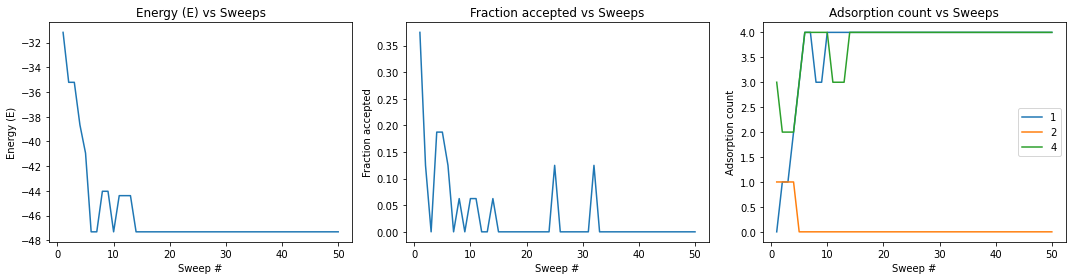

In [4]:
mcmc = MCMC(calc=lammps_calc, canonical=False, testing=False, surface_name=surface_name, 
            element=element, adsorbates=element, 
            relax=False, optimizer=optimizer) # no relaxation

start = perf_counter()
# call the main function
mcmc.mcmc_run(num_sweeps=num_sweeps,
    temp=temp,
    pot=chem_pot,
    alpha=alpha,
    slab=slab
    )

stop = perf_counter()
print(f"Time taken = {stop - start} seconds")